In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

%matplotlib inline
sns.set(style="darkgrid")

In [5]:
df = pd.read_csv("data/netflix_titles.csv")
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [6]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [7]:
#feature extraction
df['date_added']= pd.to_datetime(df['date_added'].str.strip(), format='mixed', errors='coerce')
df['year_added']= df['date_added'].dt.year
df['momth_added']= df['date_added'].dt.month
df['country']= df['country'].fillna("Unknown")

In [16]:
type_counts = df['type'].value_counts().reset_index()
type_counts.columns = ['type', 'count']

fig = px.pie(type_counts, names='type', values='count', title='Distribution of TV Shows vs Movies')
fig.show()

Text(0.5, 1.0, 'Top 10 Content Producing Countries')

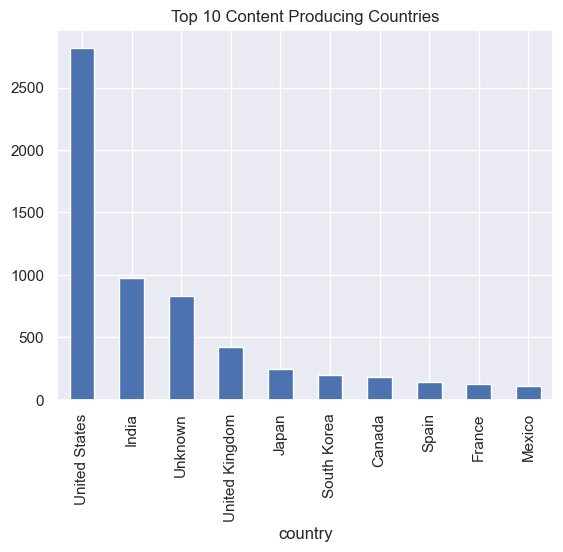

In [10]:
df['country'].value_counts().head(10).plot(kind='bar')
plt.title('Top 10 Content Producing Countries')

C:\Users\Rafa Inamdar\AppData\Local\Temp\ipykernel_9260\2579508111.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_genres.index, x=top_genres.values, palette="Set2")


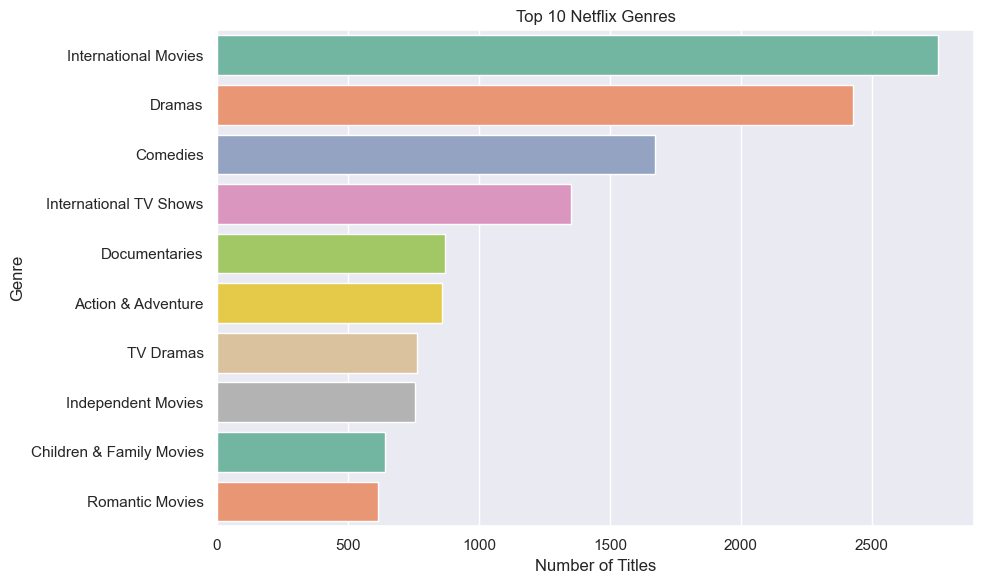

In [14]:
df_genre = df.copy()
df_genre['listed_in'] = df_genre['listed_in'].str.split(', ')
df_genre = df_genre.explode('listed_in')

top_genres = df_genre['listed_in'].value_counts().head(10)

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.barplot(y=top_genres.index, x=top_genres.values, palette="Set2")
plt.title("Top 10 Netflix Genres")
plt.xlabel("Number of Titles")
plt.ylabel("Genre")
plt.tight_layout()
plt.show()

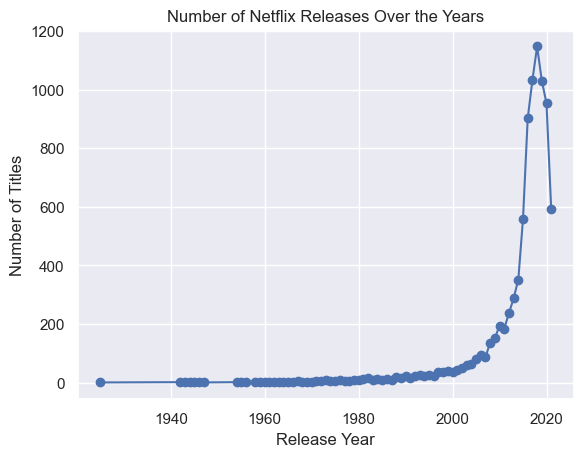

In [11]:
import matplotlib.pyplot as plt

release_counts = df['release_year'].value_counts().sort_index()

plt.plot(release_counts.index, release_counts.values, marker='o')
plt.title('Number of Netflix Releases Over the Years')
plt.xlabel('Release Year')
plt.ylabel('Number of Titles')
plt.show()

In [12]:
%pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


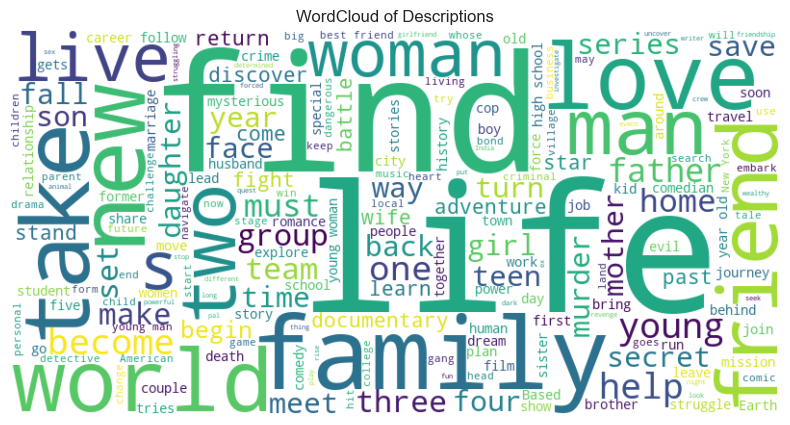

In [13]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

text = " ".join(df['description'].dropna())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud of Descriptions')
plt.show()
